In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=42)

In [67]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [68]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

### elbow method

In [69]:
inertia = []  # WCSS
K_range = range(1,11)

In [70]:
for k in K_range:
    Kmean = KMeans(n_clusters=k, random_state=42)
    Kmean.fit(X_scaled)
    inertia.append(Kmean.inertia_)

In [71]:
inertia

[1000.0,
 297.8954141051723,
 11.57548472310498,
 9.752067977356841,
 8.257175272446284,
 6.9175773204168,
 6.334755391595291,
 5.704177177901429,
 5.060234133532076,
 4.762361898130396]

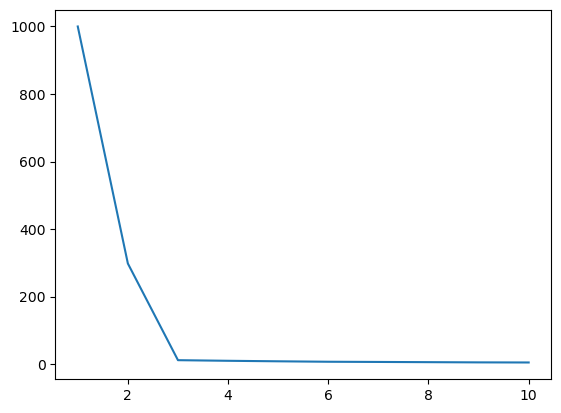

In [72]:
plt.plot(K_range, inertia )
plt.show()

In [92]:
Kmeans_final = KMeans(n_clusters=3, random_state=42)

In [93]:
cluster_label = Kmeans_final.fit_predict(X_scaled)

In [94]:
cluster_label

array([1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2,
       0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0,
       2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0,
       0, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0,

In [95]:
df['cluster'] = cluster_label

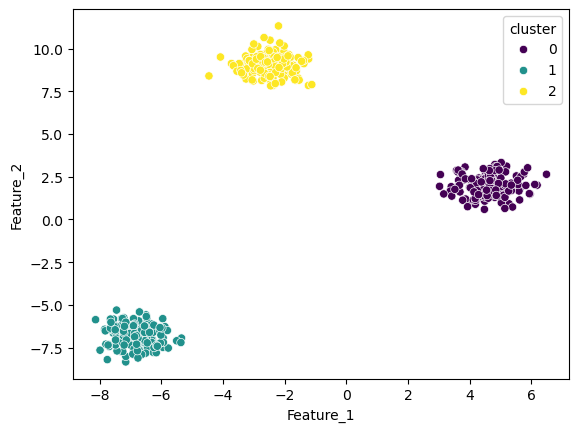

In [96]:
sns.scatterplot(
    x=df['Feature_1'],
    y=df['Feature_2'],
    hue=df['cluster'],
    palette='viridis'
)

plt.show()